# Face Landmark Model
MediaPipe Face Mesh is a solution that estimates 468 3D face landmarks in real-time even on mobile devices. It employs machine learning (ML) to infer the 3D facial surface, requiring only a single camera input without the need for a dedicated depth sensor. Utilizing lightweight model architectures together with GPU acceleration throughout the pipeline, the solution delivers real-time performance critical for live experiences.

Each triangle vertex will be used as a landmark point. Connection pairs between the vertexes can be found with: mp_holistic.FACEMESH_TESSELATION  


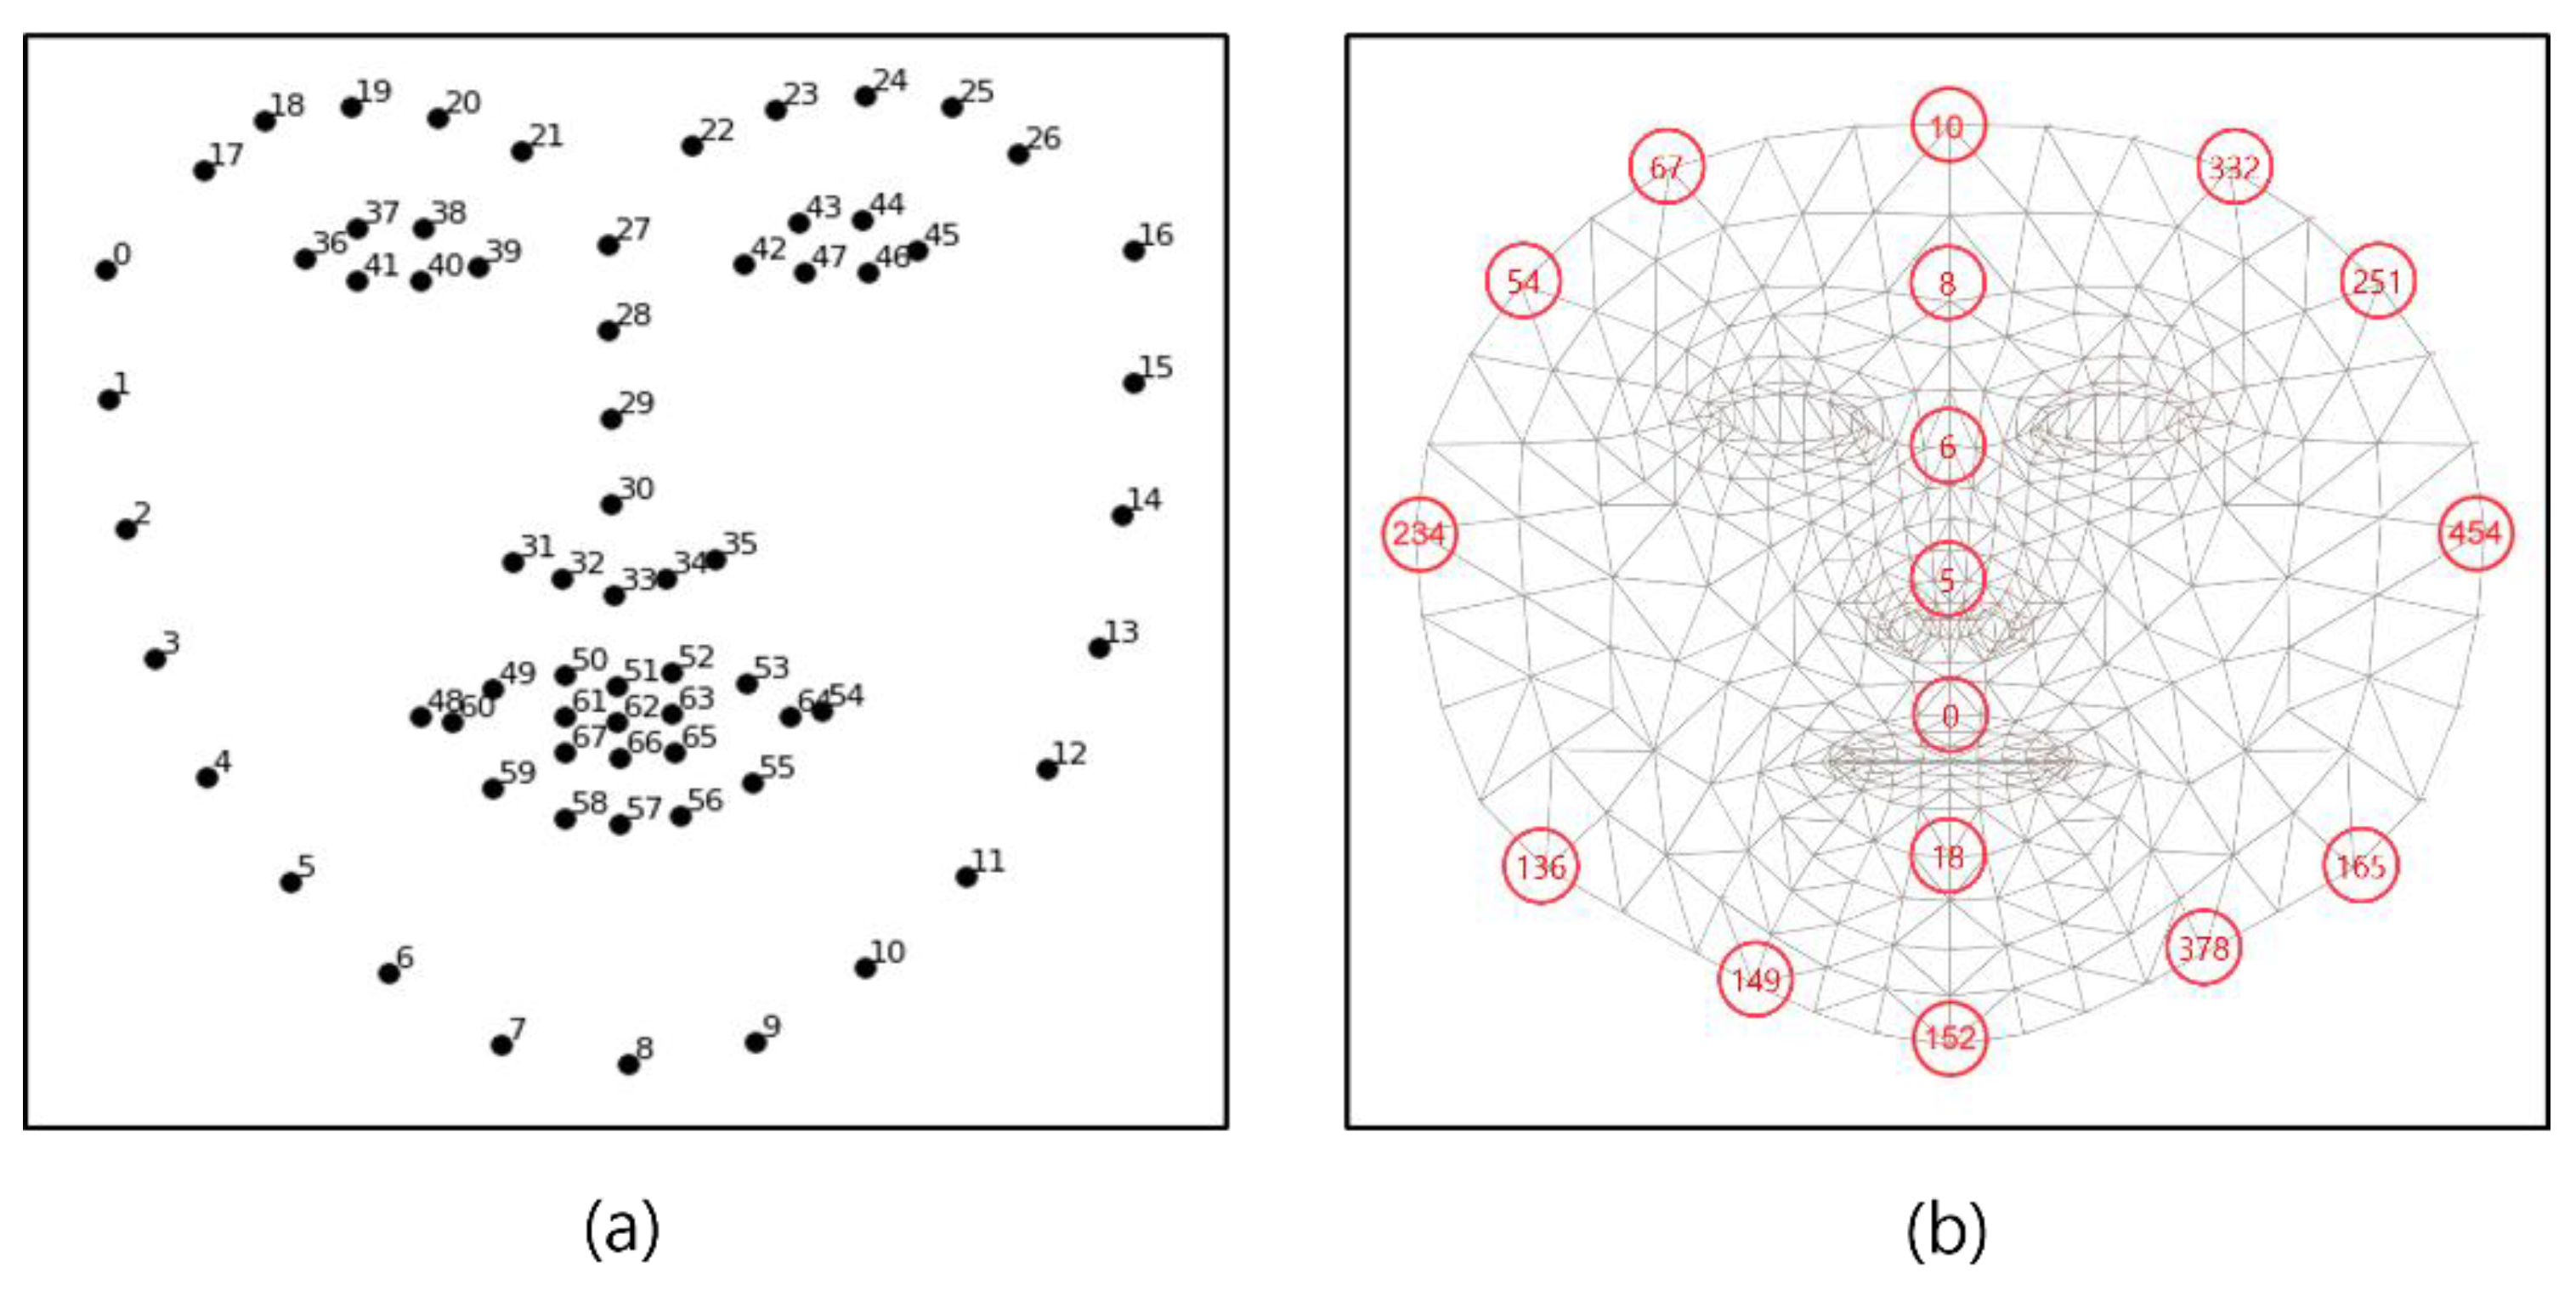

# Hand Landmark Model
MediaPipe Hands is a high-fidelity hand and finger tracking solution. It employs machine learning (ML) to infer 21 3D landmarks of a hand from just a single frame.


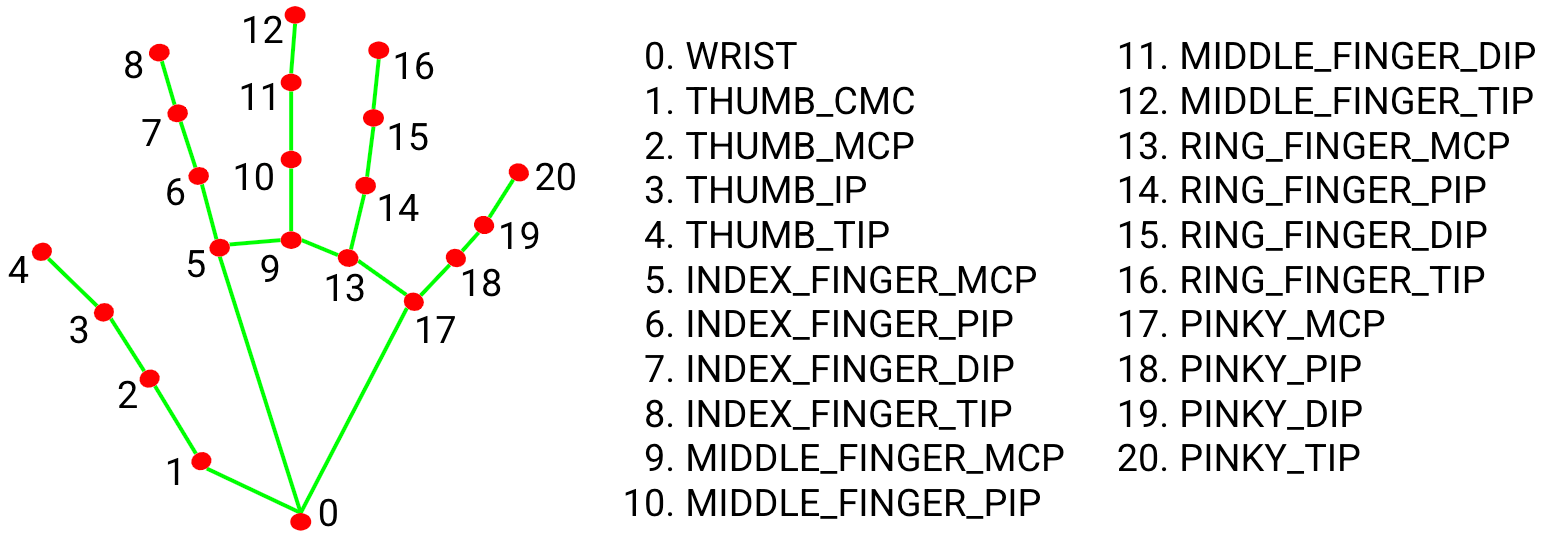

# Pose Landmark Model
MediaPipe Pose is a ML solution for high-fidelity body pose tracking, inferring 33 3D landmarks and background segmentation mask on the whole body from RGB video frames utilizing our BlazePose research that also powers the ML Kit Pose Detection API.

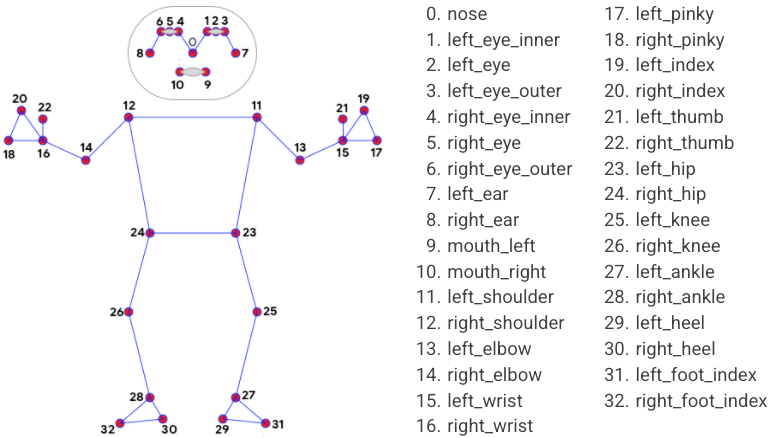

# Import dependencies

In [1]:
import mediapipe as mp    #MediaPipe Traking - Machine Learning Pipeline
import numpy as np        #Operations
import cv2                #Open CV

In [2]:
#Innitialize utilities and packages
mp_drawing = mp.solutions.drawing_utils  #drawing utilities
mp_holistic = mp.solutions.holistic      #Importing holistic model
mp_pose = mp.solutions.pose

# Get real time camera feed


In [3]:
cap = cv2.VideoCapture(0)                             #Default Hardware Capture device

while cap.isOpened():
    ret, frame = cap.read()                        #Read camera feed
    
    cv2.imshow('Holistic Model Detection',frame)   #Render video 

    if cv2.waitKey(10) & 0xFF == ord('q'):         #Hit "q" to kill camera
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
#Kill camera
cap.release()
cv2.destroyAllWindows()

# Functions

In [5]:
#Calculate angle between three joints
def calculate_angle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    
    radians = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
    #convert to absolute value degrees
    angle = np.abs((radians*180.0)/(np.pi))
    
    if angle > 180.0:
        angle = 360-angle
        
    return angle

# Calculate Elbow Angle

1. Detect Facial landmarks
2. Detect Hand Poses
3. Detect Body Poses
4. Draw real time markers
5. Calculate left elbow angle
6. Display angle real time


In [ ]:
#Default Hardware Capture device
cap = cv2.VideoCapture(0)                             

#Initiate Holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5,
                          min_tracking_confidence=0.5) as holistic:
    #Open Camera
    while cap.isOpened(): 
        #Read Camera Feed
        ret, frame = cap.read()    
        
        #Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
        
        #Make Detections
        results = holistic.process(image)              
        #print(results.face_landmarks)
        #face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        #Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 

        
        #Extract Landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            #Get Coordinates
            shoulder = [landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].y]
            #Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            #Visualzie angle
            cv2.putText(image,str(angle),tuple(np.multiply(elbow,[640,480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
            print(landmarks)
        except:
            pass

        #1. Draw Face Landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                  mp_drawing.DrawingSpec(color = (255,255,0),thickness = 1, circle_radius = 1),     #dot color
                                  mp_drawing.DrawingSpec(color = (192,192,192),thickness = 1, circle_radius = 1))   #connection color
        
        #2. Draw right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color = (80,22,10),thickness = 2, circle_radius = 4),
                                  mp_drawing.DrawingSpec(color = (80,44,121),thickness = 2, circle_radius = 2))

        #3. Draw left hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color = (121,22,76),thickness = 2, circle_radius = 4),
                                  mp_drawing.DrawingSpec(color = (121,44,250),thickness = 2, circle_radius = 2))
        #4. Draw pose detection
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color = (245,117,66),thickness = 2, circle_radius = 4),
                                  mp_drawing.DrawingSpec(color = (245,66,230),thickness = 2, circle_radius = 2))
        
        
        #Render Video
        cv2.imshow('Holistic Model Detection',image)   
        
        #Hit "q" to kill camera
        if cv2.waitKey(10) & 0xFF == ord('q'):         
            break
    
cap.release()
cv2.destroyAllWindows()

In [ ]:
#Chech Landmark connections 
#mp_holistic.HAND_CONNECTIONS       #hand connections
#mp_holistic.FACEMESH_TESSELATION   #face connections
#mp_holistic.POSE_CONNECTIONS       #pose connections
#len(landmarks)

In [ ]:
#for lan in mp_holistic.PoseLandmark:
#    print(lan)

In [ ]:
#landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value]
#landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value]
#landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value]

In [ ]:
#mp_holistic.PoseLandmark.LEFT_SHOULDER.value
#mp_holistic.PoseLandmark.RIGHT_WRIST.value 

In [ ]:
#shoulder = [landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].y]
#elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
#wrist = [landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].y]

In [ ]:
#shoulder, elbow, wrist

In [ ]:
#angle = calculate_angle(shoulder, elbow, wrist)
#print(angle)